In [1]:
# Importing the libraries:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# remove warning
import warnings
warnings.filterwarnings(action='ignore')
print('Libraries have been imported')

Libraries have been imported


# Step-1: Gathering Data

In [2]:
# Reading the dengue data 
Dengue_df = pd.read_excel('Data/DengueAndClimateBangladesh.xlsx')


In [3]:
# Checking the number of  rows and columns
print('Shape of data: {}'.format(Dengue_df.shape))
print('Number of rows: {}'.format(Dengue_df.shape[0]))
print('Number of columns: {}'.format(Dengue_df.shape[1]))

Shape of data: (192, 2)
Number of rows: 192
Number of columns: 2


# Step-2: Data preprocessing

In [4]:
Dengue_df.set_index('Month', inplace=True)
# Checking for some values of the data
data=Dengue_df.copy()
data.head(3)

,Dengue Cases
Month,
2008-01-01,0
2008-02-01,0
2008-03-01,0


# Step-3: Exploratory Data Analysis (EDA)

In [5]:
# printing information about the DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2008-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Dengue Cases  192 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dengue Cases,192.0,2828.359375,10934.576551,0.0,7.0,69.0,414.25,79598.0


### Visual test

In [7]:
plt.style.use('fivethirtyeight')
color_par = sns.color_palette()

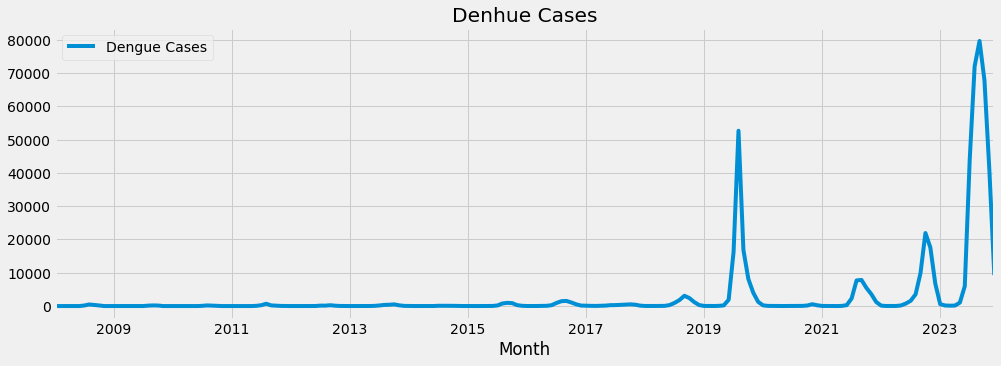

In [8]:
data.plot(figsize=(15,5),color = color_par[0],title = 'Denhue Cases')
plt.show()

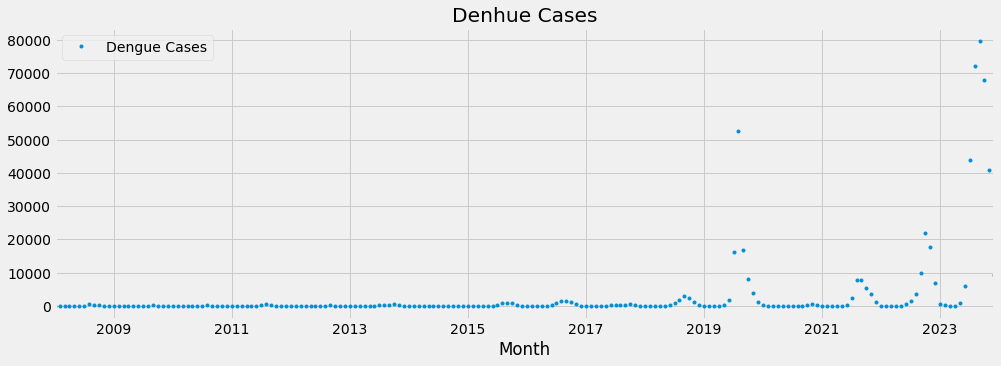

In [9]:
data.plot(figsize=(15,5),style='.',color = color_par[0],title = 'Denhue Cases')
plt.show()

<font color ='red'>Note: </font> Although its very clear that we have a trend (varying mean) in the above series, this visual approach might not always give accurate results. It is better to confirm the observations using some statistical tests.

<Figure size 864x432 with 0 Axes>

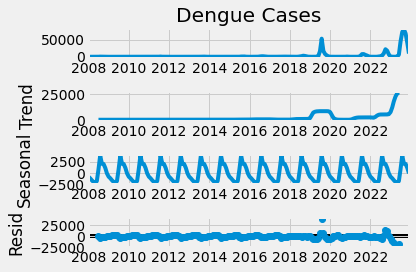

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

#  Seasonal analysis of the time series data.
results = seasonal_decompose(data['Dengue Cases'])
plt.figure(figsize=(12, 6))
results.plot()
plt.show()


In [11]:
data['month'] = data.index.month
data['quarter'] = data.index.quarter
data['year'] = data.index.year

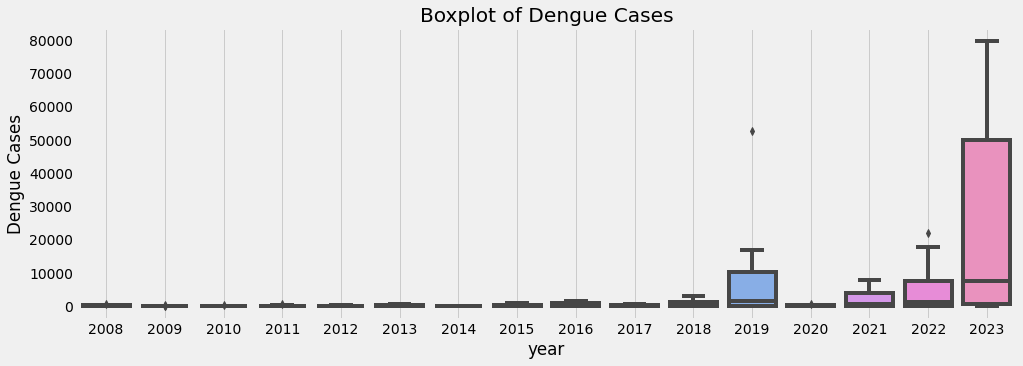

In [12]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='year',y='Dengue Cases')
plt.title('Boxplot of Dengue Cases')
plt.ylabel('Dengue Cases')
plt.grid()
plt.show()

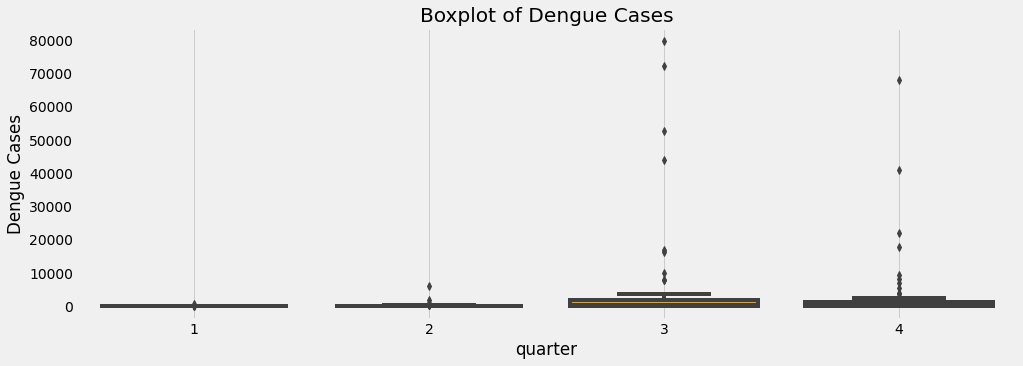

In [13]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='quarter',y='Dengue Cases')
plt.title('Boxplot of Dengue Cases')
plt.ylabel('Dengue Cases')
plt.grid()
plt.show()

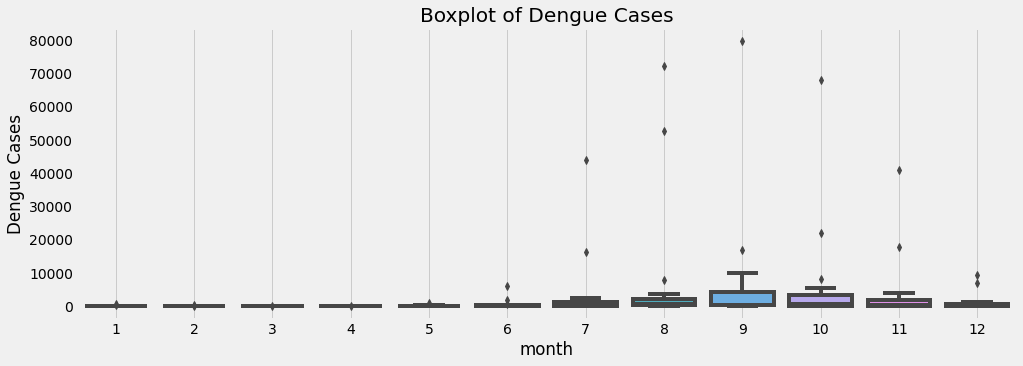

In [14]:
plt.subplots(figsize=(15,5))
sns.boxplot(data=data,x='month',y='Dengue Cases')
plt.title('Boxplot of Dengue Cases')
plt.ylabel('Dengue Cases')
plt.grid()
plt.show()

# Step-4: Performing the ADF test on the series

In [15]:
df=Dengue_df.copy()

In [16]:
# Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [17]:
# Taking out the passengers number as a series.
series = df['Dengue Cases'].values
series

array([    0,     0,     0,     0,     0,     0,   160,   473,   334,
         184,     0,     0,     0,     0,     0,     0,     1,     0,
           4,   125,   188,   154,     0,     0,     0,     0,     0,
           0,     0,     0,    61,   183,   120,    45,     1,     0,
           0,     0,     0,     0,     0,    61,   255,   691,   193,
         114,    36,     9,     0,     0,     0,     0,     0,    10,
         129,   122,   246,   107,    27,     0,     6,     7,     3,
           3,    12,    50,   172,   339,   385,   501,   218,    53,
          15,     7,     2,     0,     8,     9,    82,    80,    76,
          63,    22,    11,     0,     0,     2,     6,    10,    28,
         171,   765,   965,   869,   271,    75,    13,     3,    17,
          38,    70,   254,   926,  1451,  1544,  1077,   522,   145,
          92,    58,    36,    73,   134,   267,   286,   346,   430,
         512,   409,   126,    26,     7,    19,    29,    52,   295,
         946,  1796,

In [18]:
# ADF Test
ADF_test = adfuller(series, autolag='AIC')
ADF_test

(-0.30293180549616705,
 0.9250880732150504,
 8,
 183,
 {'1%': -3.466598080268425,
  '5%': -2.8774669520682674,
  '10%': -2.5752604356654425},
 3536.2011685367597)

The null and alternate hypothesis of this test are: 

* Null Hypothesis: The series has a unit root (value of a =1)
    
* Alternate Hypothesis: The series has no unit root.


* Ho: It is non stationary

* H1: It is stationary

If we fail to reject the null hypothesis, we can say that the series is non-stationary.

In [19]:
def adfuller_test(Cases):
    ADF_test=adfuller(Cases)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(ADF_test,labels):
        print(label+' : '+str(value) )
    if ADF_test[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [20]:
adfuller_test(series)

ADF Test Statistic : -0.30293180549616705
p-value : 0.9250880732150504
#Lags Used : 8
Number of Observations Used : 183
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


 <font color ='red'>Note: </font> Here in the results, we can see that the p-value for time series is greater than 0.05, and we can say we fail to reject the null hypothesis and the time series is non-stationary. 

## Differencing

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'df'
df['Differenced'] = df['Dengue Cases'].diff(1)  # First-order differencing
df['Seasonal_Differenced'] = df['Differenced'].diff(12)  # Seasonal differencing

In [22]:
# Applying test dickey fuller test
adfuller_test(df['Seasonal_Differenced'].dropna())

ADF Test Statistic : -5.407121201689916
p-value : 3.27248177621712e-06
#Lags Used : 11
Number of Observations Used : 167
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Accoording to Dfuller test I=d=1

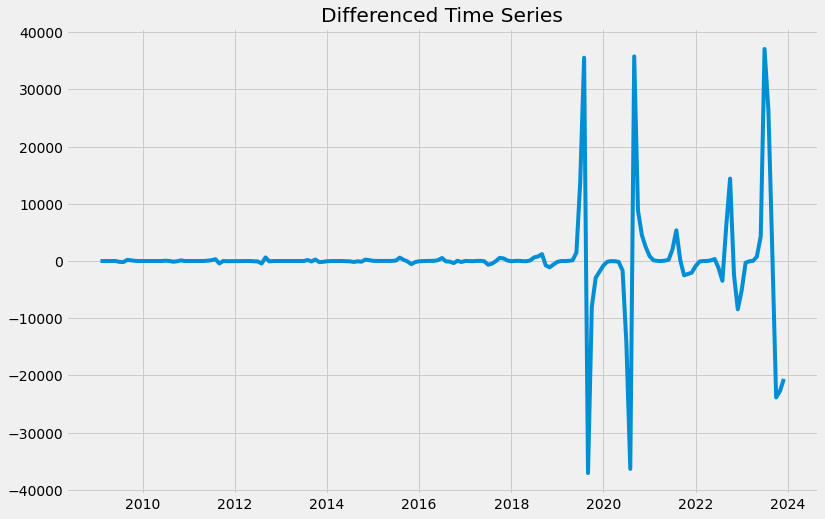

In [23]:
# Plot the differenced series
plt.figure(figsize=(12, 8))
plt.plot(df['Seasonal_Differenced'])
plt.title('Differenced Time Series')
plt.show()

# Step-5: Applying Auto Regressive Model

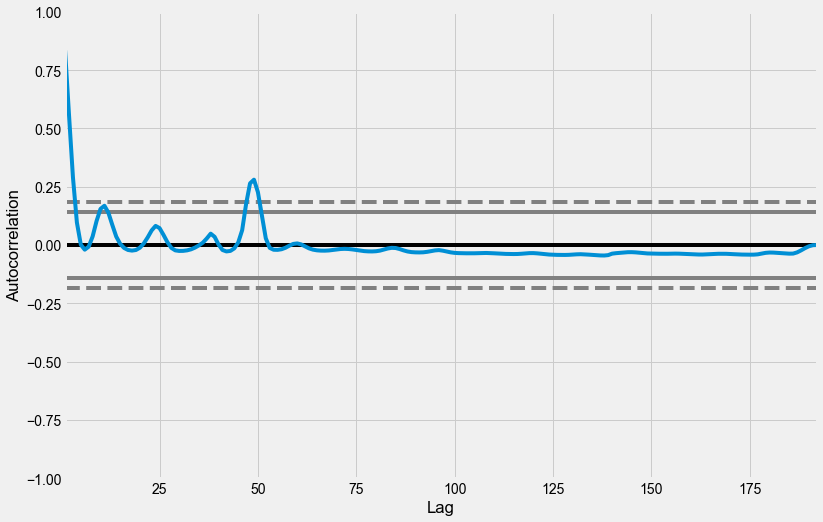

In [24]:
from pandas.plotting import autocorrelation_plot
plt.subplots(figsize=(12,8))
autocorrelation_plot(df['Dengue Cases'])
sns.set(style='dark')
plt.grid()
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

* Identification of an AR model is often best done with the PACF.
* Identification of an MA model is often best done with the ACF rather than the PACF.

<Figure size 864x576 with 0 Axes>

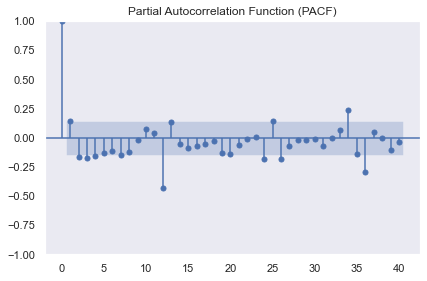

In [26]:
# Plot PACF
plt.figure(figsize=(12, 8))
plot_pacf(df['Seasonal_Differenced'].iloc[13:], lags=40, title='Partial Autocorrelation Function (PACF)')
plt.show()

According to PACF plot AR=p=1

<Figure size 864x576 with 0 Axes>

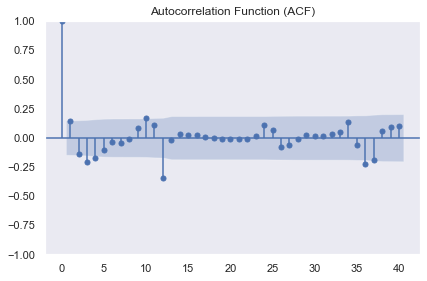

In [27]:
# Plot ACF
plt.figure(figsize=(12, 8))
plot_acf(df['Seasonal_Differenced'].iloc[13:], lags=40, title='Autocorrelation Function (ACF)')
plt.show()

According to PACF plot MA=q=1

Note: ARIMA should be selected when data is not Seasonal

# Step-6: Spliting Train And Test Datasett

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [29]:
train_size = int(len(df['Dengue Cases']) * 0.8)  # 80% for training
train_size

153

In [30]:
train, test = df['Dengue Cases'].iloc[:train_size], df['Dengue Cases'].iloc[train_size:]

In [31]:
test

Month
2020-10-01      164
2020-11-01      546
2020-12-01      231
2021-01-01       32
2021-02-01        9
2021-03-01       13
2021-04-01        3
2021-05-01       43
2021-06-01      272
2021-07-01     2286
2021-08-01     7698
2021-09-01     7841
2021-10-01     5458
2021-11-01     3567
2021-12-01     1207
2022-01-01      126
2022-02-01       20
2022-03-01       20
2022-04-01       23
2022-05-01      163
2022-06-01      737
2022-07-01     1571
2022-08-01     3521
2022-09-01     9911
2022-10-01    21932
2022-11-01    17583
2022-12-01     6775
2023-01-01      566
2023-02-01      166
2023-03-01      111
2023-04-01      143
2023-05-01     1036
2023-06-01     5956
2023-07-01    43854
2023-08-01    71976
2023-09-01    79598
2023-10-01    67769
2023-11-01    40716
2023-12-01     9288
Name: Dengue Cases, dtype: int64

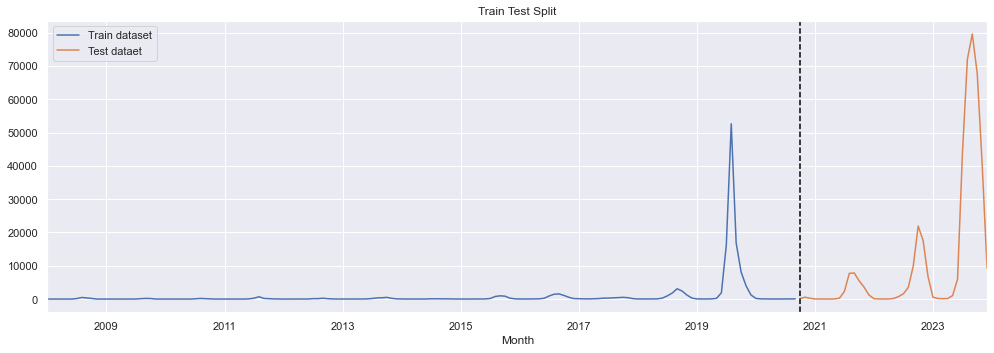

In [32]:
fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax)
test.plot(ax=ax)
ax.axvline('10-01-2020',color = 'Black',ls = '--')
plt.legend(['Train dataset','Test dataet'])
plt.title('Train Test Split')
plt.grid()
plt.show()

# Step-7: Applying SARIMA Model

In [33]:
import statsmodels.api as sm

In [34]:
model=sm.tsa.statespace.SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
fit_model=model.fit()

c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Dengue Cases   No. Observations:                  153
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1363.255
Date:                            Mon, 12 Feb 2024   AIC                           2736.509
Time:                                    21:17:25   BIC                           2751.218
Sample:                                01-01-2008   HQIC                          2742.486
                                     - 09-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5619      0.091      6.183      0.000       0.384       0.740
ma.L1         -0.9922      0.107     -9.238      0.000      -1.203      -0.782
ar.S.L12      -0.9998      1.561     -0.641      0.522      -4.059       2.059
ma.S.L12      -0.0202      1.630     -0.012      0.990      -3.214       3.174
sigma2      1.647e+07   1.52e-06   1.09e+13      0.000    1.65e+07    1.65e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):             48527.59
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):            4788.17   Skew:                             8.57
Prob(H) (two-sided):                  0.00   Kurtosis:                        92.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.87e+28. Standard errors may be unstable.
"""

### Forecasting

In [36]:
# Forecasting on the test set
forecast = fit_model.forecast(steps=len(test))

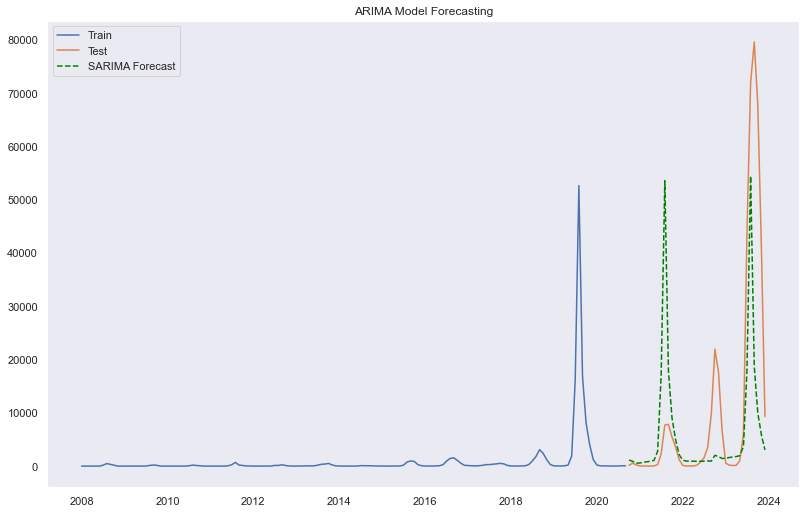

In [37]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='SARIMA Forecast', color='green',linestyle='--')
plt.title('ARIMA Model Forecasting')
plt.legend()
plt.show()

# Step-8: Accuracy Testing

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
# Assuming 'test' is your test set and 'forecast' is the predicted values
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 9091.472915014814
Mean Squared Error (MSE): 320794419.3378128
Root Mean Squared Error (RMSE): 17910.73475147831


# Step-9: Forecasting for the years 2024 to 2026

In [40]:
# Forecasting for the years 2024 to 2026
future_years = pd.date_range(start='2024-01-01', end='2026-12-31', freq='M')
forecast = fit_model.forecast(steps=len(future_years))

In [41]:
# Creating a DataFrame for the forecast
forecast_df = pd.DataFrame({'Month': future_years, 'Dengue Cases Forecast': forecast})
forecast_df.set_index('Month', inplace=True)

# Displaying the forecast DataFrame for the years 2024 to 2026
forecast_df.head()

,Dengue Cases Forecast
Month,
2024-01-31,1127.938447
2024-02-29,885.949104
2024-03-31,537.491558
2024-04-30,582.822415
2024-05-31,723.539587


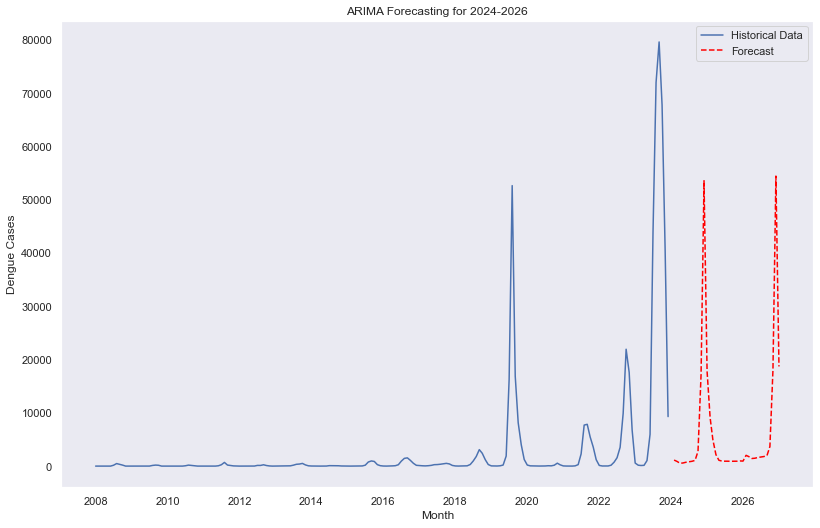

In [42]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Dengue Cases'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Dengue Cases Forecast'], label='Forecast', color='red',linestyle='--')
plt.title('ARIMA Forecasting for 2024-2026')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()

# XGBoost, short for Extreme Gradient Boosting
It is an ensemble learning method that combines the predictions of multiple weak models (decision trees) to create a strong predictive model. XGBoost is known for its scalability, speed, and ability to handle complex relationships in the data.

In [43]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [44]:
df=Dengue_df.copy()

In [45]:
# Splitting the dataset into Train and Test sets
train_size = int(len(df) * 0.8)  # 80% for training
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [46]:
# Feature engineering: Creating lag features
def create_lag_features(data, lag):
    for i in range(1, lag + 1):
        data[f'Lag_{i}'] = data['Dengue Cases'].shift(i)
    return data.dropna()

lag = 12  # Example lag value, you can adjust based on your data
train = create_lag_features(train, lag)
test = create_lag_features(test, lag)

# Splitting features and target variable
X_train, y_train = train.drop(columns=['Dengue Cases']), train['Dengue Cases']
X_test, y_test = test.drop(columns=['Dengue Cases']), test['Dengue Cases']

In [47]:
# XGBoost model training
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
# Forecasting
forecast = model.predict(X_test)
forecast

array([ 3757.824   ,  1241.4343  ,  1198.0225  ,   214.18532 ,
          39.034267,    28.56233 ,    26.477163,    34.041622,
         927.5266  ,   898.05554 ,  1082.2506  ,  2663.7798  ,
        4010.4124  , 13870.972   , 13870.89    ,  4006.6638  ,
         360.13812 ,   398.97058 ,   144.48546 ,   384.70987 ,
        1067.4331  ,  2717.395   , 16855.828   , 11127.753   ,
       11127.661   , 11127.594   , 11128.136   ], dtype=float32)

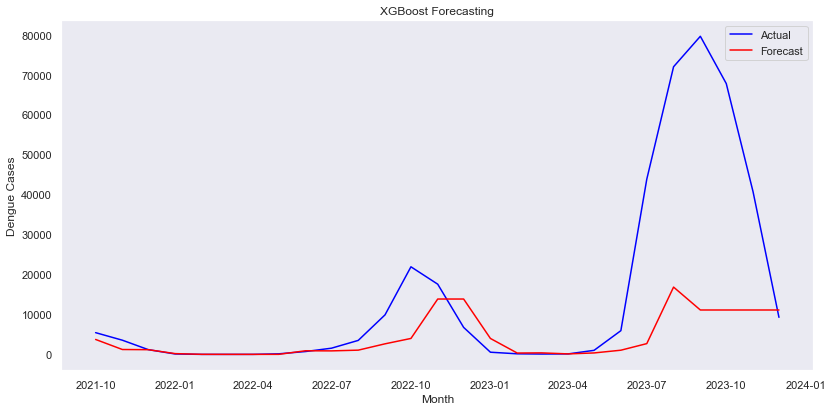

In [49]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Actual', color='blue')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('XGBoost Forecasting')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()

In [50]:
# Forecasting for the years 2024 to 2026
future_years = pd.date_range(start='2024-01-01', end='2026-12-01', freq='M')

# Creating lag features for future years
future_data = pd.DataFrame(index=future_years)
for i in range(1, lag + 1):
    future_data[f'Lag_{i}'] = df['Dengue Cases'].shift(i)[-12:]  # Using the last 12 months as lag features

# Predicting Dengue Cases for future years
future_forecast = model.predict(future_data)
future_forecast

array([-4.1629925, -4.1629925, -4.1629925, -4.1629925, -4.1629925,
       -4.1629925, -4.1629925, -4.1629925, -4.1629925, -4.1629925,
       -4.1629925, -4.1629925, -4.1629925, -4.1629925, -4.1629925,
       -4.1629925, -4.1629925, -4.1629925, -4.1629925, -4.1629925,
       -4.1629925, -4.1629925, -4.1629925, -4.1629925, -4.1629925,
       -4.1629925, -4.1629925, -4.1629925, -4.1629925, -4.1629925,
       -4.1629925, -4.1629925, -4.1629925, -4.1629925, -4.1629925],
      dtype=float32)

In [51]:
# Creating a DataFrame for the forecast
forecast_df = pd.DataFrame({'Month': future_years, 'Dengue Cases Forecast': future_forecast})
forecast_df.set_index('Month', inplace=True)

# Displaying the forecast DataFrame for the years 2024 to 2026
forecast_df.head()

,Dengue Cases Forecast
Month,
2024-01-31,-4.162992
2024-02-29,-4.162992
2024-03-31,-4.162992
2024-04-30,-4.162992
2024-05-31,-4.162992


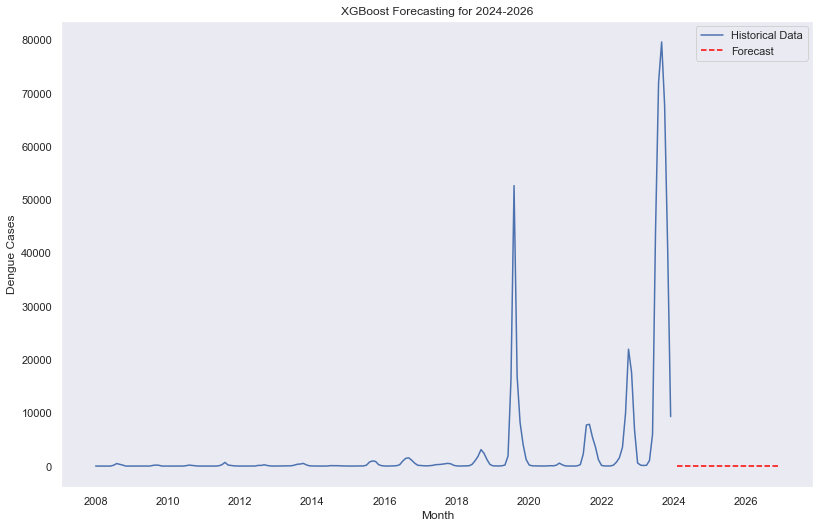

In [52]:
# Plotting the results
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Dengue Cases'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Dengue Cases Forecast'], label='Forecast', color='red',linestyle='--')
plt.title('XGBoost Forecasting for 2024-2026')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()

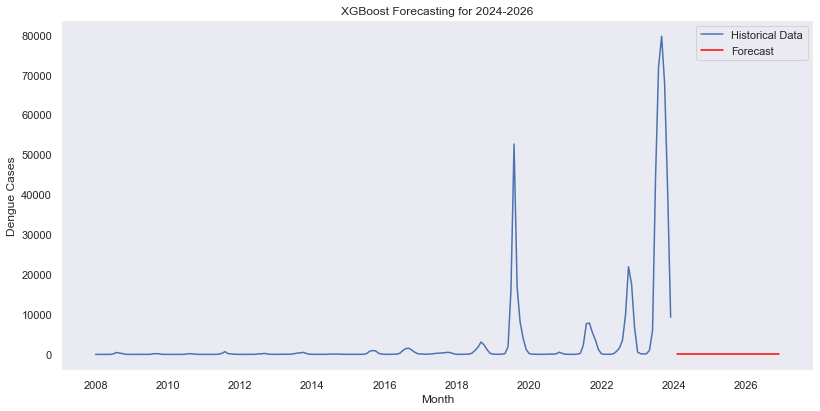

In [53]:
# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Dengue Cases'], label='Historical Data')
plt.plot(future_years, future_forecast, label='Forecast', color='red')
plt.title('XGBoost Forecasting for 2024-2026')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.legend()
plt.show()

# Long Short-Term Memory (LSTM) Networks

In [54]:
df = Dengue_df.copy()


In [56]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error


In [ ]:
# Convert the DataFrame to a numpy array
dataset = df.values


In [ ]:
dataset

Epoch 1/50
141/141 - 6s - loss: 0.0036 - 6s/epoch - 45ms/step
Epoch 2/50
141/141 - 1s - loss: 0.0034 - 856ms/epoch - 6ms/step
Epoch 3/50
141/141 - 1s - loss: 0.0033 - 646ms/epoch - 5ms/step
Epoch 4/50
141/141 - 1s - loss: 0.0031 - 534ms/epoch - 4ms/step
Epoch 5/50
141/141 - 1s - loss: 0.0030 - 578ms/epoch - 4ms/step
Epoch 6/50
141/141 - 0s - loss: 0.0029 - 463ms/epoch - 3ms/step
Epoch 7/50
141/141 - 0s - loss: 0.0029 - 463ms/epoch - 3ms/step
Epoch 8/50
141/141 - 0s - loss: 0.0029 - 468ms/epoch - 3ms/step
Epoch 9/50
141/141 - 0s - loss: 0.0028 - 488ms/epoch - 3ms/step
Epoch 10/50
141/141 - 0s - loss: 0.0029 - 453ms/epoch - 3ms/step
Epoch 11/50
141/141 - 0s - loss: 0.0028 - 432ms/epoch - 3ms/step
Epoch 12/50
141/141 - 0s - loss: 0.0028 - 435ms/epoch - 3ms/step
Epoch 13/50
141/141 - 0s - loss: 0.0028 - 465ms/epoch - 3ms/step
Epoch 14/50
141/141 - 0s - loss: 0.0028 - 433ms/epoch - 3ms/step
Epoch 15/50
141/141 - 0s - loss: 0.0028 - 435ms/epoch - 3ms/step
Epoch 16/50
141/141 - 0s - loss: 0.0

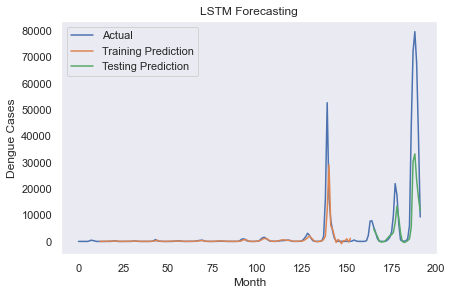

In [55]:

dataset = dataset.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split the data into train and test sets
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Function to create dataset with look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape into X=t and Y=t+1
look_back = 12  # Example window size, you can adjust based on your data
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Plot the results
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:look_back+len(trainPredict), :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict
plt.plot(scaler.inverse_transform(dataset), label='Actual')
plt.plot(trainPredictPlot, label='Training Prediction')
plt.plot(testPredictPlot, label='Testing Prediction')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.title('LSTM Forecasting')
plt.legend()
plt.show()

